In [84]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


# Simple Linear Regression

In [85]:
insur = pd.read_csv("insurance.csv")

Columns from insurance.csv file shown below.

In [86]:
insur.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
insur[["age", "charges"]]

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


Scatterplot of Age against Insurance Charges shown below.

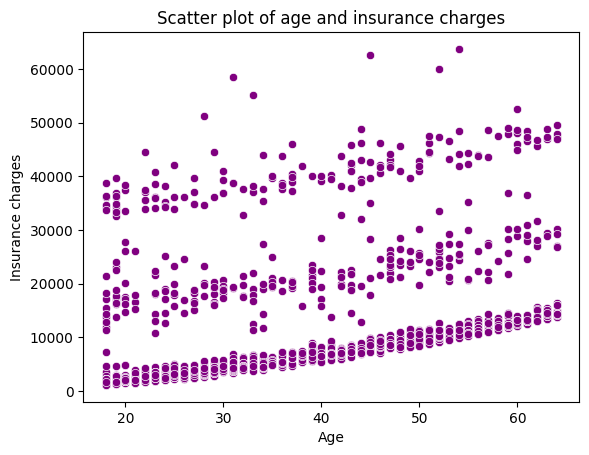

In [88]:
x_var = insur["age"]
y_var = insur["charges"]

sns.scatterplot(x=x_var, y=y_var, color="purple")
plt.xlabel("Age")
plt.ylabel("Insurance charges")
plt.title("Scatter plot of age and insurance charges")
plt.show()


The below code creates a graph of Age against Insurance charges with a simple linear regression line. 

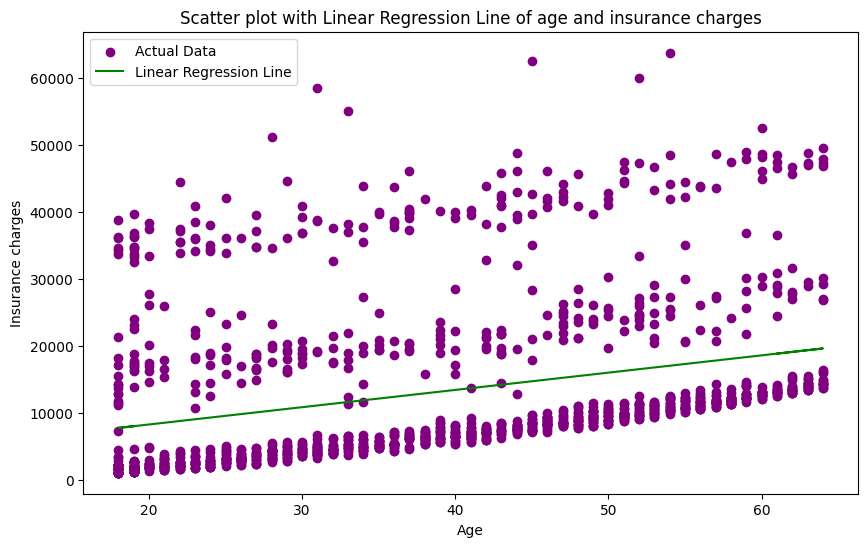

In [97]:
x = x_var.values.reshape(-1,1)
y = y_var.values 

model = LinearRegression()
model.fit(x,y)

predictions = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(x_var, y_var, label="Actual Data", color="purple")
plt.plot(x_var, predictions, color="green", label="Linear Regression Line")
plt.xlabel("Age")
plt.ylabel("Insurance charges")
plt.title("Scatter plot with Linear Regression Line of age and insurance charges")
plt.legend()
plt.show()

Making predictions with the linear regression model - e.g. insurance charge at age 70 shown below.

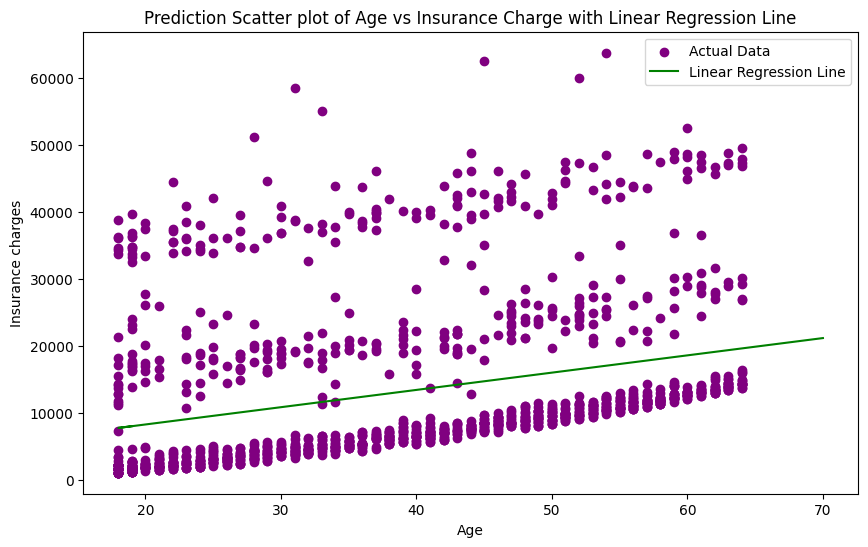

Insurance charge at age 70 should be: [21206.46831275]


In [101]:
age70 = [[70]]

x_pred = np.append(x, 70).reshape(-1,1)
y_pred = model.predict(x_pred)

plt.figure(figsize=(10, 6))
plt.scatter(x,y,color = "purple", label="Actual Data")
plt.plot(x_pred,y_pred,color = "green", label="Linear Regression Line")
plt.xlabel("Age")
plt.ylabel("Insurance charges")
plt.title("Prediction Scatter plot of Age vs Insurance Charge with Linear Regression Line")
plt.legend()
plt.show()

print(f"Insurance charge at age 70 should be: {model.predict(age70)}")


Below graph shows BMI against Insurance charges with a simple linear regression line.

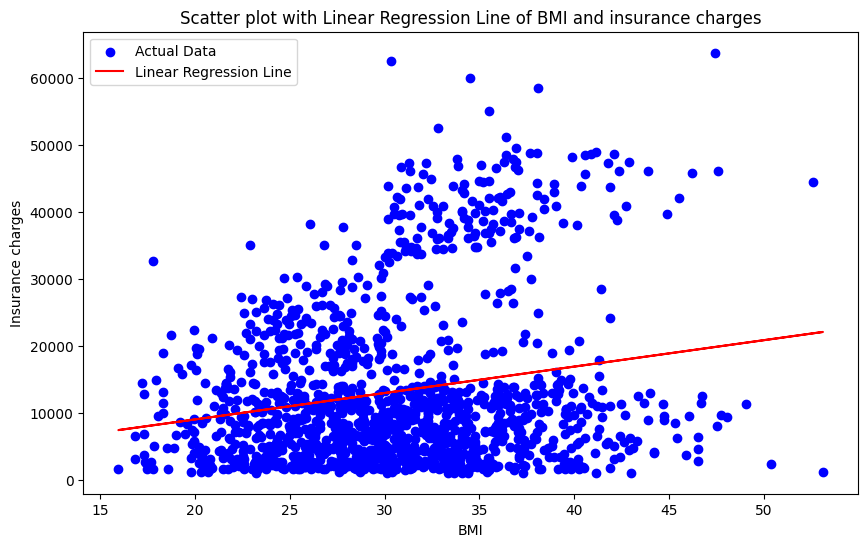

In [102]:
x_bmi = insur["bmi"].values.reshape(-1,1)
y_charges = insur["charges"]

# Fit the linear regression model
bmi_model = LinearRegression()
bmi_model.fit(x_bmi, y_charges)

# Make predictions
bmi_predictions = bmi_model.predict(x_bmi)

# Plot the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_bmi, y_charges, label="Actual Data", color="blue")
plt.plot(x_bmi, bmi_predictions, color="red", label="Linear Regression Line")
plt.xlabel("BMI")
plt.ylabel("Insurance charges")
plt.title("Scatter plot with Linear Regression Line of BMI and insurance charges")
plt.legend()
plt.show()



Bar graph of gender (x-axis) and insurance charges (y-axis) with error line shown below.

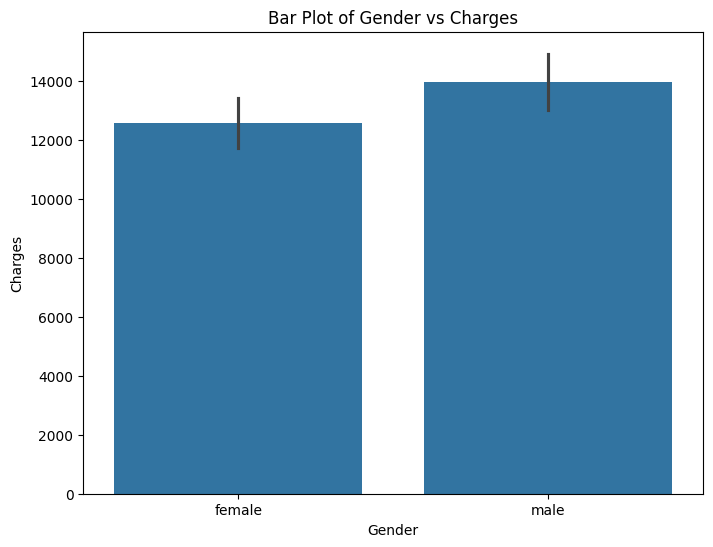

In [104]:
x_gender = insur["sex"]
y_gender = insur["charges"]

plt.figure(figsize=(8, 6))
sns.barplot(data=insur, x="sex", y="charges")
plt.title('Bar Plot of Gender vs Charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

# Multiple Linear Regression

In [93]:
insur.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The model below uses the age and charges column (linear regression line graph plotted above) and trains data on it, then produces a graph of actual vs predicted values for the age and charges column.

The score at the bottom shows the coefficient of determination which is 12.75% for the above model of Age against Insurance Charges. This means the model explains 12.75% of the variability on the test data so the model is unable to explain a significant proportion of the variability. It may be that there are other factors not captured by the model which could be influencing the overall results. 

Intercept: [3165.88500606]
Coefficients: [[257.72261867]]

Training data: (1070, 1) (1070, 1)
Test data: (268, 1) (268, 1)

Score: 0.12752853224187122


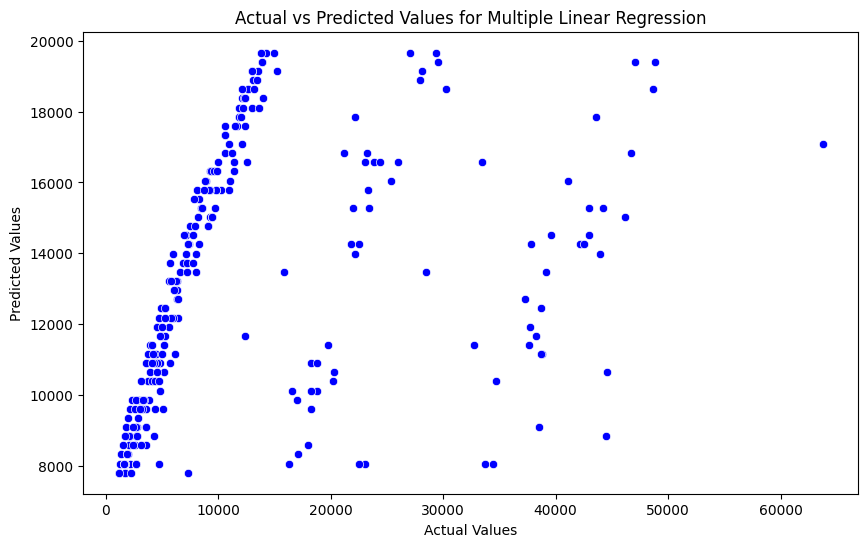

In [106]:
x_age = insur["age"].values.reshape(-1,1)
y_charges = insur["charges"].values.reshape(-1,1)

# Fit the linear regression model
age_charge_model = LinearRegression()
age_charge_model.fit(x_age, y_charges)

# Make predictions
age_charge_predictions = age_charge_model.predict(x_age)

# Print intercept and coefficients
print(f"Intercept: {age_charge_model.intercept_}")
print(f"Coefficients: {age_charge_model.coef_}\n")

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_age, y_charges, test_size=0.20, random_state=42)

print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

print ("\nScore:", age_charge_model.score(X_test, y_test))

# Make predictions on test set
age_charge_predictions_test = age_charge_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.flatten(), y=age_charge_predictions_test.flatten(), color="b")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Multiple Linear Regression')
plt.show()

